<a href="https://colab.research.google.com/github/jamoffl3/24ADI204_DSV_TEAM10/blob/main/Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [5]:
finance_df = pd.read_csv(
    "/content/Bitcoin_11_12_2025-12_02_2026_historical_data_coinmarketcap.csv",
    sep=";"
)

In [6]:
tweets_df = pd.read_csv(
    "/content/crypto_10k_tweets_(2021_2022Nov).csv",
    engine="python",
    encoding="latin1",
    on_bad_lines="skip"
)

In [7]:
finance_df["timeOpen"] = pd.to_datetime(finance_df["timeOpen"], errors="coerce")
numeric_cols = [
    "open", "high", "low", "close",
    "volume", "marketCap", "circulatingSupply"
]

In [8]:
for col in numeric_cols:
    finance_df[col] = (
        finance_df[col]
        .astype(str)
        .str.replace(",", "", regex=True)
        .str.replace("$", "", regex=True)
        .str.replace("%", "", regex=True)
    )
    finance_df[col] = pd.to_numeric(finance_df[col], errors="coerce")

finance_numeric = finance_df[numeric_cols]

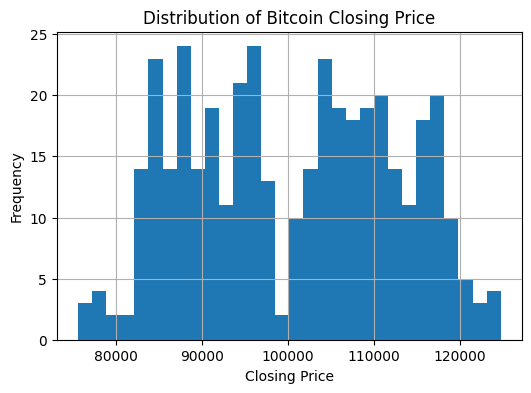

In [9]:
plt.figure(figsize=(6,4))
finance_df["close"].hist(bins=30)
plt.title("Distribution of Bitcoin Closing Price")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.show()

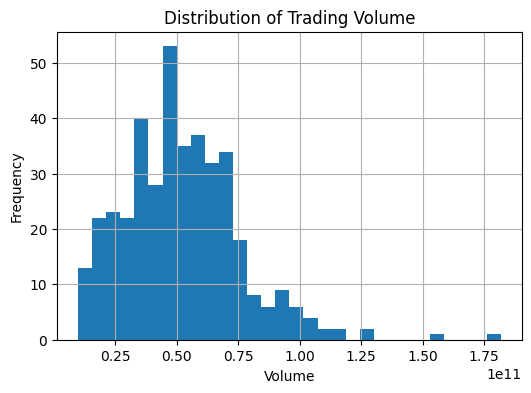

In [10]:
plt.figure(figsize=(6,4))
finance_df["volume"].hist(bins=30)
plt.title("Distribution of Trading Volume")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()

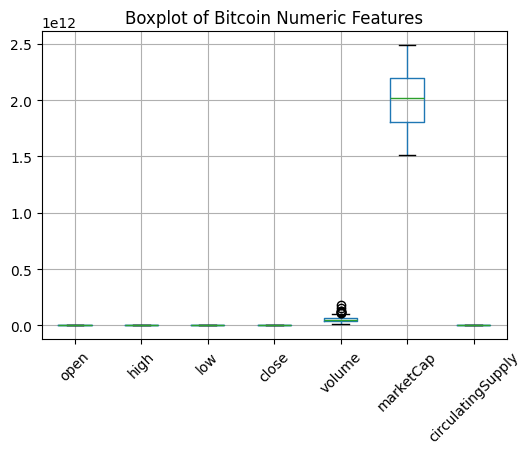

In [11]:
plt.figure(figsize=(6,4))
finance_numeric.boxplot()
plt.title("Boxplot of Bitcoin Numeric Features")
plt.xticks(rotation=45)
plt.show()

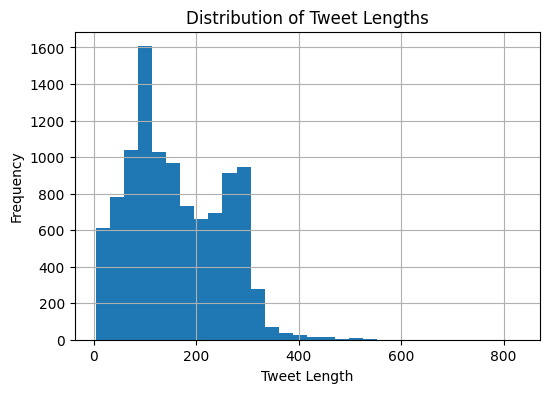

In [12]:
tweets_df["Date"] = pd.to_datetime(tweets_df["Date"], errors="coerce")
tweets_df["tweet_length"] = tweets_df["Content"].astype(str).apply(len)

plt.figure(figsize=(6,4))
tweets_df["tweet_length"].hist(bins=30)
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.show()

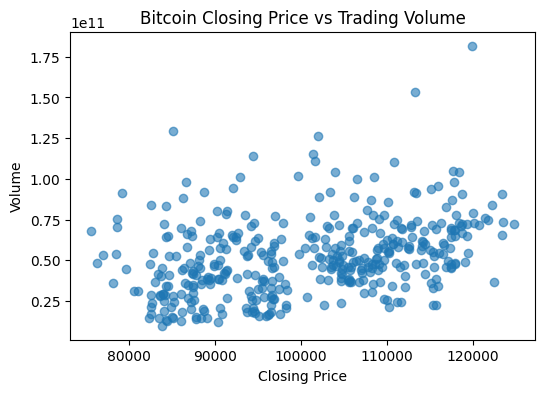

In [13]:
plt.figure(figsize=(6,4))
plt.scatter(finance_df["close"], finance_df["volume"], alpha=0.6)
plt.title("Bitcoin Closing Price vs Trading Volume")
plt.xlabel("Closing Price")
plt.ylabel("Volume")
plt.show()

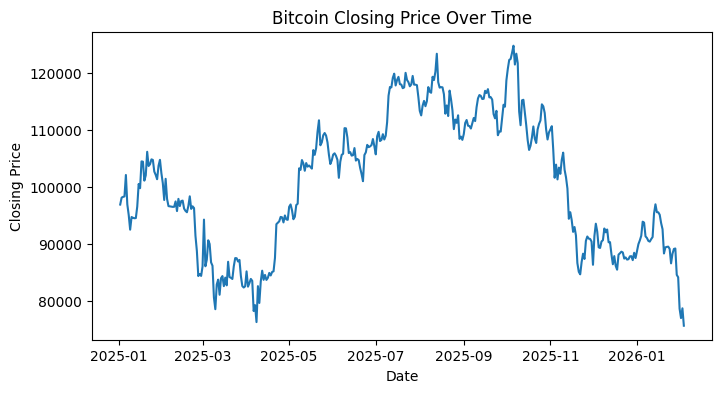

In [14]:
plt.figure(figsize=(8,4))
plt.plot(finance_df["timeOpen"], finance_df["close"])
plt.title("Bitcoin Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

In [15]:
corr_matrix = finance_numeric.corr()
print("Correlation Matrix:\n")
print(corr_matrix)

print("\nCorrelation between Closing Price and Volume:")
print(corr_matrix.loc["close", "volume"])

print("\nWeek 4 EDA Completed Successfully.")

Correlation Matrix:

                       open      high       low     close    volume  \
open               1.000000  0.992793  0.988652  0.983810  0.371107   
high               0.992793  1.000000  0.987135  0.992368  0.406368   
low                0.988652  0.987135  1.000000  0.992258  0.292772   
close              0.983810  0.992368  0.992258  1.000000  0.349143   
volume             0.371107  0.406368  0.292772  0.349143  1.000000   
marketCap          0.983888  0.992147  0.992367  0.999784  0.352010   
circulatingSupply  0.091205  0.077525  0.093997  0.079312  0.176252   

                   marketCap  circulatingSupply  
open                0.983888           0.091205  
high                0.992147           0.077525  
low                 0.992367           0.093997  
close               0.999784           0.079312  
volume              0.352010           0.176252  
marketCap           1.000000           0.099903  
circulatingSupply   0.099903           1.000000  

Correlati